In [1]:
import networkx as nx
from matplotlib import pyplot
import aisa

# This is an example notebook for AISA

In this notebook we show how to use the module `aisa` to create a *range dependent graph* and find its planted partition.

See the following papers for reference:

- **State aggregations in Markov chains and block models of networks**,
    *Faccin, Schaub and Delvenne* [[ArXiv](https://arxiv.org/abs/2005.00337)]

## Load a range dependent graph

A *range depentent graph* is a graph in which nodes connect with a probability that depends both on their class and on the angular distance between nodes ordered on a circle.

In [2]:
nnodes = [80, 60, 60]
eps = 0.001
alphas = [
    [0.8, eps, eps],
    [eps, 0.8, eps],
    [eps, eps, 0.8],
]
gammas = [
    [0.8, 1, 1],
    [1, 0.8, 1],
    [1, 1, 0.8],
]
graph = aisa.utils.range_dependent_graph(nnodes, alphas, gammas)
graph = nx.from_scipy_sparse_matrix(graph)
print('Nodes:', len(graph))
print('Edges:', graph.number_of_edges())

Nodes: 200
Edges: 1132


# Find the best partition
according to the time scale parameter $T$ and the model selection parameter $\beta$.

In [3]:
best_partition, ai = aisa.best_partition(graph, T=3, beta=0.3)
print("Autoinformation", ai)

0 [3]:   5%|▌         | 500/10000 [00:04<01:30, 105.25it/s]


Autoinformation 0.6217996520351114


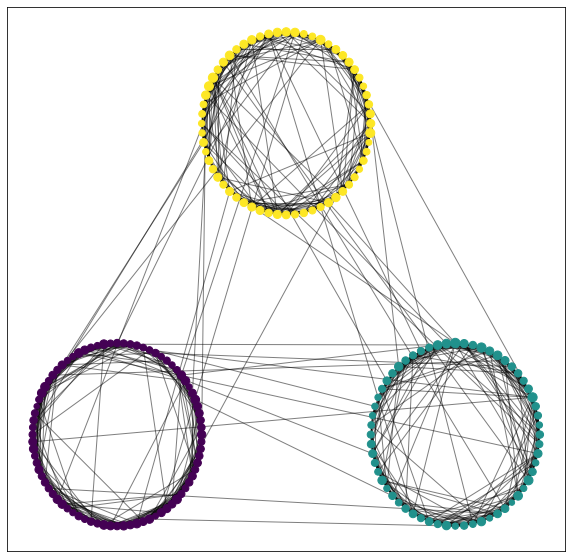

In [4]:
_ = pyplot.figure(figsize=(10, 10))

nold = 0
pos = {}
centers = [(-2, 0), (2, 0), (0, 3.4)]
for n, c in zip(nnodes, centers):
    subg = graph.subgraph(range(nold, nold + n))
    nold += n
    subg_pos = nx.circular_layout(subg, center=c)
    pos.update(subg_pos)
    
degree = [d * 5 for _, d in graph.degree()]
nx.draw_networkx_nodes(graph, pos=pos, node_size=degree, node_color=[best_partition[node] for node in graph.nodes()])
nx.draw_networkx_edges(graph, pos=pos, alpha=0.5)